___

# Unsupervised Learning using K-means Clustering

___

<a id='section1'></a>
## 1. Problem Statement

The objective of this notebook is to use libraries such as numpy, pandas and scikit learn in order to create a model that will help us seperate our data using K means clustering. Since this is an unsupervised learning method, we do not know exactly what class our data entries fit into. Unlike supervised learning where we have actual values as our dependent values, our objective is to predict these __actual values__ with our unsupervised clustering.

We will be using the famous iris dataset and attemping to classify the the flowers into their 3 species using K-means clustering.

___

<a id='section2'></a>
## 2. Dataset Overview

- We will be using the famous Iris dataset of flowers in this project. As we know, this dataset contains various features about the flowes such as petal length, sepal width, etc.
- This dataset has __150 samples__ in total between which there are 3 subspecies of flowers.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| sepal length (cm)           | Length of sepal in centimeters                                                 | 
| sepal width (cm)      | Width of sepal in centimeters                        |
| petal length (cm)           | Length of petal in centimeters                                                 | 
| petal width (cm)      | Width of petal in centimeters                        |


__Importing Packages__

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
%matplotlib inline

__Importing the dataset__

In [13]:
# Loading in the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [15]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
iris_df.isnull().sum()                                  #Here we can see the number of NULL values in the following columns

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

As we can see, there are no missing values or erroneous values in our data so we can proceed to our post processing steps.

___

<a id='section3'></a>
## 3. Preparing Training Set

Now we will create our training set. Since this is an unsupervised learning algorithm, we will not have a __y__ (an array with our actual values) that we usually use to compare our predictions with during the training process.

In [18]:
X = iris_df.iloc[:,:].values

Our training set is set to all values in our dataset. This include all our columns as well as our rows as we will not need to perform any splitting for a testing and training set.

___

<a id='section4'></a>
## 4. Training the Model

- To train our model, we will be required to input the number of classes we would like our model to classify the data points into. 
- This is a required parameter of the KMeans algorithm and is crucial in determining how accurate our model is. This could be based on the business problem or based on the actual dataset.
- In our case, we are already familliar with the iris dataset and know for a fact that there are 3 distinct species of flowers and so our ideal scenario would be to classify these data points into 3 clusters but most times we perform unsupervised learning, we will now have this knowledge beforehand.
- In these cases, we can use a method called the 'Elbow Method' to deduce the best number of clusters to divide our data points into.

__Using the Elbow Method :__

- We will be using the inertia of these data points to use the elbow method. The inertia is basically how far away the points within a cluster are. It is also sometimes called WCSS or within cluster sum of squared. 
- This means that the smaller the interia, the better it is for us. The problem with just looking for the lowest inertia possible is that the value of interia naturally reduces as the number of clusters increase.
- We can not simply increase the number of clusters indefinitely either. This means we have to have some sort of trade-off between the number of clusters and the inertia.
- The elbow method comes in at this point and allows us to find a good middleground between the two. We will look for the 'elbow' in our inertia value while increasing the number of clusters.

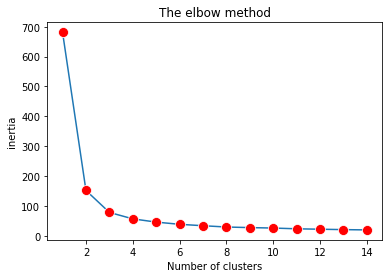

In [30]:
inertia = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
sns.lineplot(x=range(1,15),y=inertia, marker='o',markerfacecolor='red', markersize=10)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia') # Value of inertia
plt.show()

- In the above code, we set an arbitrary value for the variable i. We will use this variable to represent the number of clusters in our model and each loop, we will increase the number of clusters by 1. After we train our model on this current value of i, we will calculate the inertia value each time and add it to a list called 'inertia'.

- We then use seaborn to make a plot of these values and highlight them at each value of i. This gives us a graph which clearly shows the drop off of inertia as well as the 'elbow'. 
- From our obeservation, it looks as though the value of inertia drops sharply up until 3 clusters and then the decrease in inertia is very gradual. For this reason, we will choose the value 3 as the number of clusters to train our model with.

In [31]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 0)
kmeans_3 = kmeans.fit_predict(X)

___

<a id='section4'></a>
## 4. Visualizing the Data

Finally, lets look at how our algorithm has classified these data points. Apart from just looking at the different clusters, we will also look at what centroids were picked.

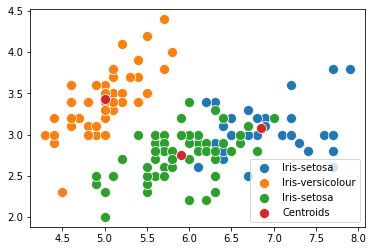

In [58]:
# Visualising the clusters as well as the centroids
sns.scatterplot(x=X[kmeans_3 == 0, 0], y=X[kmeans_3 == 0, 1], alpha=1,label = 'Iris-setosa',s=100)
sns.scatterplot(x=X[kmeans_3 == 1, 0], y=X[kmeans_3 ==1, 1], alpha=1,label = 'Iris-versicolour',s=100)
sns.scatterplot(x=X[kmeans_3 == 2, 0], y=X[kmeans_3 == 2, 1], alpha=1,label = 'Iris-setosa',s=100)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:,1], alpha=1,label = 'Centroids',s=100)
plt.legend()

___

<a id='section5'></a>
## 5. Conclusion

- We were able to first load in the dataset with which we wanted to work with.
- Using libraries such as numpy, we looked into our data to see if it contained any erroneous or missing values.
- Once we completed this checks, we moved on to checking how to get the appropriate number of clusters for our data using the elbow method.
- We then made our training set so that we would be able to train our algorithm with the deduced number of clusters.
- Lastly, we made a visualization of our classified data points and looked at the centroids which the K-Means clustering algorithm had picked.

___